In [ ]:
#https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

In [ ]:
from google.colab import drive
drive.mount('/googlenet_or_inception')

Mounted at /googlenet_or_inception


In [ ]:

#!unzip '/googlenet_or_inception/MyDrive/CIFAR-10 - Object Recognition in Images.zip' -d '/googlenet_or_inception/MyDrive/googlenet_dataset'

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
 (X_train, Y_train), (X_valid, Y_valid) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [ ]:
c=X_train[0].shape
c

(32, 32, 3)

In [ ]:
X_train[0]


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
import numpy as np
import cv2
#X_train = np.array([cv2.resize(img, (224,224)) for img in X_train[:,:,:,:]])

In [ ]:
Y_train.shape

(50000, 1)

In [ ]:
#install d21()
#!pip install d2l==0.15.1

     |████████████████████████████████| 61kB 5.8MB/s 


In [ ]:
#install -U mxnet-cu101(no need again installation)
#!pip install -U mxnet-cu101==1.7.0

     |███████████████████████████████▌| 834.1MB 1.3MB/s eta 0:00:10tcmalloc: large alloc 1147494400 bytes == 0x6577c000 @  0x7f9ea60d7615 0x591e47 0x4cc179 0x4cc2db 0x50a1cc 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50cc96 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x58e683 0x50c127 0x5095c8 0x50a2fd 0x50beb4 0x507be4 0x509900 0x50a2fd 0x50beb4 0x5095c8 0x50a2fd
     |████████████████████████████████| 846.0MB 22kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [ ]:
from d2l import tensorflow as d2l
import tensorflow as tf

class Inception(tf.keras.Model):
    # `c1`--`c4` are the number of output channels for each path
    def __init__(self, c1, c2, c3, c4):
        super().__init__()
        # Path 1 is a single 1 x 1 convolutional layer
        self.p1_1 = tf.keras.layers.Conv2D(c1, 1, activation='relu')
        # Path 2 is a 1 x 1 convolutional layer followed by a 3 x 3
        # convolutional layer
        self.p2_1 = tf.keras.layers.Conv2D(c2[0], 1, activation='relu')
        self.p2_2 = tf.keras.layers.Conv2D(c2[1], 3, padding='same',
                                           activation='relu')
        # Path 3 is a 1 x 1 convolutional layer followed by a 5 x 5
        # convolutional layer
        self.p3_1 = tf.keras.layers.Conv2D(c3[0], 1, activation='relu')
        self.p3_2 = tf.keras.layers.Conv2D(c3[1], 5, padding='same',
                                           activation='relu')
        # Path 4 is a 3 x 3 maximum pooling layer followed by a 1 x 1
        # convolutional layer
        self.p4_1 = tf.keras.layers.MaxPool2D(3, 1, padding='same')
        self.p4_2 = tf.keras.layers.Conv2D(c4, 1, activation='relu')


    def call(self, x):
        p1 = self.p1_1(x)
        p2 = self.p2_2(self.p2_1(x))
        p3 = self.p3_2(self.p3_1(x))
        p4 = self.p4_2(self.p4_1(x))
        # Concatenate the outputs on the channel dimension
        return tf.keras.layers.Concatenate()([p1, p2, p3, p4])

In [ ]:
def b1():
    return tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, 7, strides=2, padding='same',
                               activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

In [ ]:
def b2():
    return tf.keras.Sequential([
        tf.keras.layers.Conv2D(64, 1, activation='relu'),
        tf.keras.layers.Conv2D(192, 3, padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

In [ ]:
def b3():
    return tf.keras.models.Sequential([
        Inception(64, (96, 128), (16, 32), 32),
        Inception(128, (128, 192), (32, 96), 64),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

In [ ]:
def b4():
    return tf.keras.Sequential([
        Inception(192, (96, 208), (16, 48), 64),
        Inception(160, (112, 224), (24, 64), 64),
        Inception(128, (128, 256), (24, 64), 64),
        Inception(112, (144, 288), (32, 64), 64),
        Inception(256, (160, 320), (32, 128), 128),
        tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')])

In [ ]:
def b5():
    return tf.keras.Sequential([
        Inception(256, (160, 320), (32, 128), 128),
        Inception(384, (192, 384), (48, 128), 128),
        tf.keras.layers.GlobalAvgPool2D(),
        tf.keras.layers.Flatten()
    ])
# Recall that this has to be a function that will be passed to
# `d2l.train_ch6()` so that model building/compiling need to be within
# `strategy.scope()` in order to utilize the CPU/GPU devices that we have
def net():
    return tf.keras.Sequential([b1(), b2(), b3(), b4(), b5(),
                                tf.keras.layers.Dense(10)])

In [ ]:
X = tf.random.uniform(shape=(1, 96, 96, 1))
for layer in net().layers:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Sequential output shape:	 (1, 24, 24, 64)
Sequential output shape:	 (1, 12, 12, 192)
Sequential output shape:	 (1, 6, 6, 480)
Sequential output shape:	 (1, 3, 3, 832)
Sequential output shape:	 (1, 1024)
Dense output shape:	 (1, 10)


In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=96)


loss 0.244, train acc 0.907, test acc 0.899
1434.7 examples/sec on /GPU:0


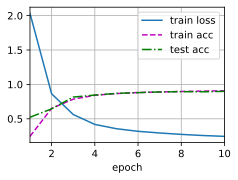

In [ ]:
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

inception_or_googlenet my implementation


In [ ]:
#https://www.kaggle.com/luckscylla/googlenet-implementation
#https://www.researchgate.net/figure/GoogleNet-architecture-31_fig2_332882012
#https://github.com/codebasics/py/blob/master/DeepLearningML/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
#!pip install d2l==0.15.1
#!pip install -U mxnet-cu101==1.7.0
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Input,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
from keras.utils import np_utils


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#define different parameters
class_num=10
batch_size=16
epoch_steps=int(4323/batch_size)
image_shape=(32,32,3)
model_name="GoogLeNet_Flowers.h5"
#image_train_path='D:/machine learning tutorial/CNN model code/cnn model code/4.Inception_v1 or googlenet/dataset/Flowers Recognition/flowers'
#img=image.load_img(image_train_path+'/sunflower/24459750_eb49f6e4cb_m.jpg')
#plt.imshow(img)
(X_train, Y_train), (X_test, Y_test) =cifar10.load_data()

c=type(X_train)
print('c : ',c)
#converted the 2D array into 1D araray
y_train1=Y_train.reshape(-1,)
#classes of the dataset of cifar10
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    

img_rows,img_cols=32,32
X_train1 = X_train.reshape(X_train.shape[0], img_cols, img_rows, 3)
X_test1 = X_test.reshape(X_test.shape[0], img_cols, img_rows, 3)


X_train2 = X_train1.astype('float32')
X_test2 = X_test1.astype('float32')
X_train3 =X_train2/ 255
X_test3 =X_test2/ 255
Y_train_p = np_utils.to_categorical(Y_train, class_num)
Y_test_p = np_utils.to_categorical(Y_test, class_num)




170500096/170498071 [==============================] - 2s 0us/step
c :  <class 'numpy.ndarray'>


In [ ]:
#prepare data
# train_datagen=ImageDataGenerator(
#     rescale=1/255,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
#     )

# generator_main=train_datagen.flow_from_directory(
#     image_train_path,
#     target_size=(image_shape[0],image_shape[1]),
#     batch_size=batch_size,
#     class_mode='categorical'
#     )

# it shows integer value of the categorical variable
# how_many_class_in_dataset=generator_main.class_indices
# def my_generator(generator):
#     while(True):
#         data=next(generator)
#         x=data[0]
#         y=data[1],data[1],data[1]
#         #print('y : ',x)
#         yield x, y   
#         #return x
# train_generator=my_generator(generator_main)



In [ ]:

def Inception(x,filter):
    #inception is derived from the picture figure (but pic er flow(kar por konta) 
    #table theke nisi)
    #https://www.researchgate.net/figure/GoogleNet-architecture-31_fig2_332882012
    
    
    #1x1
    path1=Conv2D(filters=filter[0],kernel_size=(1,1),strides=1,padding='same',activation='relu')(x)
    
    #1x1 -> 3x3
    #table theke reduce and er porerta nia couple create korbo
    path2=Conv2D(filters=filter[1][0],kernel_size=(1,1),strides=1,padding='same',activation='relu')(x)
    path2=Conv2D(filters=filter[1][1],kernel_size=(3,3),strides=1,padding='same',activation='relu')(path2)
    
    #1x1 -> 5x5
    path3=Conv2D(filters=filter[2][0],kernel_size=(1,1),strides=1,padding='same',activation='relu')(x)
    path3=Conv2D(filters=filter[2][1],kernel_size=(5,5),strides=1,padding='same',activation='relu')(path3)
    
    #3x3 -> 1x1
    path4=MaxPooling2D(pool_size=(3,3),strides=1,padding='same')(x)
    
    path4=Conv2D(kernel_size=(1,1),filters=filter[3],strides=1,padding='same',activation='relu')(path4)
    #print(path1)
    return Concatenate(axis=-1)([path1,path2,path3,path4])

In [ ]:
def GoogLe_Net():
    input_layer=Input(image_shape)
    print('input_layer : ',input_layer)
    
    #stage #1:
    layer=Conv2D(filters=64,kernel_size=(7,7),strides=2,padding='same',activation='relu')(input_layer)
    #padding='same' means size of fearure map is same of 
    #output feature map
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(layer)
    layer=BatchNormalization()(layer)
    
    
    #stage #2:
    layer=Conv2D(filters=64,kernel_size=(1,1),strides=1,padding='same',activation='relu')(layer)
    layer=Conv2D(filters=192,kernel_size=(3,3),strides=1,padding='same',activation='relu')(layer)
    layer=BatchNormalization()(layer)
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(layer)
    
    
    #stage #3:
    layer=Inception(layer,[64,(96,128),(16,32),32])
    #table er reduce and reduce er porerta eksathe bracket a likbo
    layer=Inception(layer,[128,(128,192),(32,96),64])
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(layer)
    
    
    #stage #4:
    layer=Inception(layer,[192,(96,208),(16,48),64])#4a
    layer=Inception(layer,[160,(112,224),(24,64),64])#4b
    layer=Inception(layer,[128,(128,256),(24,64),64])#4c
    layer=Inception(layer,[112,(144,288),(32,64),64])#4d
    layer=Inception(layer,[256,(160,320),(32,128),128])#4e
    layer=MaxPooling2D(pool_size=(3,3),strides=2,padding='same')(layer)
    
    
    #stage #5:
    layer=Inception(layer,[256,(160,320),(32,128),128])#5a
    layer=Inception(layer,[384,(192,384),(48,128),128])#5b
    layer=AveragePooling2D(pool_size=(1,1),strides=1,padding='valid')(layer)
    
    
    #stage #6:
    layer=Flatten()(layer)
    layer=Dropout(.4)(layer)
    layer=Dense(units=256,activation='linear')(layer)
    main=Dense(units=class_num,activation='softmax',name='main')(layer)
    model=Model(inputs=input_layer,outputs=[main])
    return model
    

model=GoogLe_Net()
model.summary()

input_layer :  KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 8, 8, 64)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchN

In [ ]:
model.compile(loss='categorical_crossentropy',
             #loss_weights={'main':1},
             optimizer='adam',
             metrics=['accuracy']
             )

In [ ]:
train_history=model.fit(
    X_train3,
    Y_train_p,
    batch_size=128,
    epochs=13,
    #shuffle=True
    )

Epoch 1/13
391/391 [==============================] - 22s 31ms/step - loss: 1.8520 - accuracy: 0.2794
Epoch 2/13
391/391 [==============================] - 11s 28ms/step - loss: 1.3529 - accuracy: 0.5000
Epoch 3/13
391/391 [==============================] - 11s 28ms/step - loss: 1.1235 - accuracy: 0.6018
Epoch 4/13
391/391 [==============================] - 11s 28ms/step - loss: 0.9804 - accuracy: 0.6548
Epoch 5/13
391/391 [==============================] - 11s 28ms/step - loss: 0.8528 - accuracy: 0.7029
Epoch 6/13
391/391 [==============================] - 11s 28ms/step - loss: 0.7398 - accuracy: 0.7457
Epoch 7/13
391/391 [==============================] - 11s 28ms/step - loss: 0.6654 - accuracy: 0.7719
Epoch 8/13
391/391 [==============================] - 11s 28ms/step - loss: 0.5851 - accuracy: 0.8014
Epoch 9/13
391/391 [==============================] - 11s 28ms/step - loss: 0.5404 - accuracy: 0.8191
Epoch 10/13
391/391 [==============================] - 11s 29ms/step - loss: 0.488

In [ ]:
#evaluate the model
model.evaluate(X_test3,Y_test_p)

313/313 [==============================] - 3s 7ms/step - loss: 1.1157 - accuracy: 0.6967


[1.1156879663467407, 0.6966999769210815]

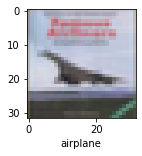

In [ ]:
y_1Darray=Y_test.reshape(-1,)
plot_sample(X_test3,y_1Darray,3)


In [ ]:
#prediction of the test dataset
y_pred=model.predict(X_test3)


In [ ]:
#preint all elements untill find 1(1 will be excluded)
y_pred[:1]

array([[2.5733418e-04, 1.7810507e-04, 1.5605311e-03, 7.6078367e-01,
        1.3658511e-03, 2.2976527e-01, 3.2307517e-03, 2.0194654e-03,
        3.6405993e-04, 4.7494867e-04]], dtype=float32)

In [ ]:
#find the index of maximum value
max_argmax=np.argmax([20,2,28,35,5,18])
max_argmax

3

In [ ]:
#find all max value and store in y_classes
y_pred_classes=[np.argmax(element) for element in y_pred]
y_pred_classes[:5]

[3, 8, 0, 0, 6]

In [ ]:
y_test1d=Y_test.reshape(-1)
y_test1d[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

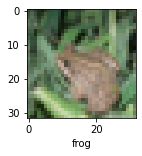

In [ ]:
#prediction calling the function
plot_sample(X_test3,y_1Darray,4)

In [ ]:
#print the class name form y_pred
classes[y_pred_classes[4]]

'frog'